In [ ]:
#load libraries
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# for visualisation
import matplotlib.pyplot as plt


In [ ]:
#load dataframe
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
unique_values = df['Drug'].unique()
unique_values

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
#summary of dataframe
df.info

<bound method DataFrame.info of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

In [ ]:
#null values

df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
#check data types
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [ ]:
#encode columns
df_encoded = df
columns_to_encode = ['Sex', 'BP', 'Cholesterol']
le = LabelEncoder()
for column in columns_to_encode:
    df_encoded[column] = le.fit_transform(df_encoded[column])




In [ ]:
#create x and y variables

X = df_encoded.drop('Drug', axis=1)
y = df_encoded['Drug']

In [ ]:
#train a decision tree
X_train, X_test, y_train, y_test = train_test_split(X,
                y, test_size=0.20, random_state=42)
data_unpruned =DecisionTreeClassifier(max_depth=None, random_state=42)
data_model = data_unpruned.fit(X_train, y_train)
print("Performance without pruning:", data_model.score(X_test, y_test)) #model is perfect with no pruning required
print("At depth:", data_model.tree_.max_depth)

Performance without pruning: 1.0
At depth: 4


In [ ]:
#fit model
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

<function matplotlib.pyplot.show(close=None, block=None)>

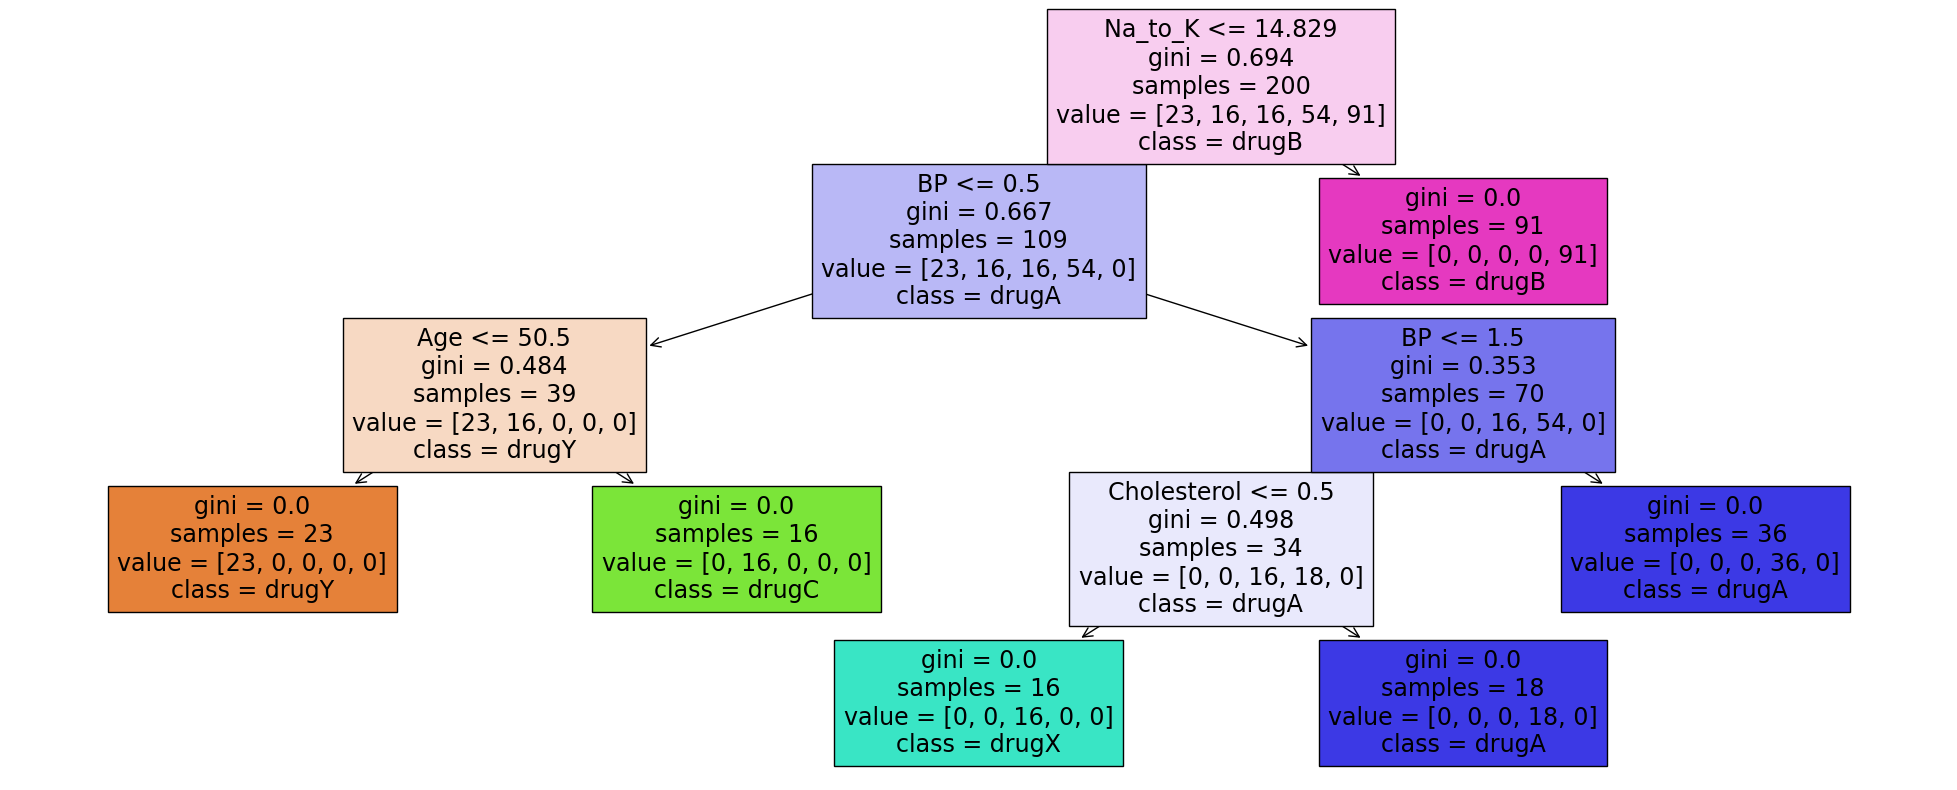

In [ ]:
#plot decision tree
fig, ax = plt.subplots(figsize=(25, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=y.unique(), filled=True, ax=ax)

plt.show



In [ ]:
#check accuracy
y_pred = data_unpruned.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"accuracy : {accuracy}")

accuracy : 100.0


In [ ]:
#print confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 6,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0, 11,  0],
       [ 0,  0,  0,  0, 15]])